# DS_3_6_2 Airline Arrivals
Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

http://stat-computing.org/dataexpo/2009/the-data.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from itertools import islice
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Load data

In [2]:

#data = pd.read_csv('airline_arrivals_2007.csv')

In [3]:
my_cols_historic = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [4]:
historic_list_master = []
t = np.arange(0,1)
historic_list = []
log_file = open("err_log_airline_arrivals.log", "a")
try:
    for x in t:
        f = r"C:\Users\fxea1410\airline_arrivals_2007_frendy_data.csv"
        for name in glob.glob(f):
            with open(name) as historic_content:
                head = islice(historic_content, 1,1000000)
                for line in head:
                    historic_list.append(line.rstrip('\n').strip().split(","))
        historic_list_master.append(historic_list)
        historic_list = []
except Exception as e:
    log_file.write("error {0}\n".format(str(e)))        
       
finally:
    if not log_file.closed:
        log_file.close() 

In [5]:
del head, historic_list

In [6]:
data = pd.DataFrame(data=historic_list_master[0],columns=my_cols_historic)

In [7]:
#data.to_csv("airline_arrivals_2007_frendy_data.csv", mode='w', index=False)

# Data Exploration and Cleansing

In [8]:
print(data.shape)
print(data.columns)
data.head()

(745322, 29)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232,1225,1341,1340,WN,2891,...,4,11,0,,0,0,0,0,0,0
1,2007,1,1,1,836,835,1119,1130,WN,2575,...,7,8,0,,0,0,0,0,0,0
2,2007,1,1,1,2219,2105,2332,2225,WN,2083,...,3,8,0,,0,0,0,0,0,67
3,2007,1,1,1,1630,1630,1746,1750,WN,1146,...,6,10,0,,0,0,0,0,0,0
4,2007,1,1,1,810,810,1347,1405,WN,873,...,4,8,0,,0,0,0,0,0,0


In [9]:
data.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [10]:
data.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [11]:
data = data.astype({"Month":"int64","DayOfWeek":"int64","CRSDepTime":"int64","LateAircraftDelay":"int64"})
print('')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745322 entries, 0 to 745321
Data columns (total 29 columns):
Year                 745322 non-null object
Month                745322 non-null int64
DayofMonth           745322 non-null object
DayOfWeek            745322 non-null int64
DepTime              745322 non-null object
CRSDepTime           745322 non-null int64
ArrTime              745322 non-null object
CRSArrTime           745322 non-null object
UniqueCarrier        745322 non-null object
FlightNum            745322 non-null object
TailNum              745322 non-null object
ActualElapsedTime    745322 non-null object
CRSElapsedTime       745322 non-null object
AirTime              745322 non-null object
ArrDelay             745322 non-null object
DepDelay             745322 non-null object
Origin               745322 non-null object
Dest                 745322 non-null object
Distance             745322 non-null object
TaxiIn               745322 non-null object
TaxiOut    

# Feature Engineering

## Carriers feature, large, medium and small

In [12]:
data.UniqueCarrier.unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

In [13]:
carriers = {'wn':'large_carriers','ua':'large_carriers','dl':'large_carriers',
                  'fl':'large_carriers','aa':'large_carriers',
                  'ha':'medium_carriers','mq':'medium_carriers',
                  'as':'medium_carriers','b6':'medium_carriers',
                  'co':'medium_carriers','xe':'small_carriers',
                  'yv':'small_carriers','oh':'small_carriers',
                  'oo':'small_carriers','us':'small_carriers',
                  'ev':'small_carriers','f9':'small_carriers',
                  'nw':'small_carriers','9e':'small_carriers','aq':'small_carriers'}

In [14]:
data["carriers"] = data["UniqueCarrier"].str.lower().map(carriers)


In [15]:
data.loc[(data["carriers"].isnull() == False),"carriers"].shape

(745322,)

In [16]:
features = pd.DataFrame()
dataTemp = pd.get_dummies(data["carriers"],drop_first=True)
features = dataTemp
features.tail()

,medium_carriers,small_carriers
745317,0,0
745318,0,0
745319,0,0
745320,0,0
745321,0,0


## Seasons of the Year Feature, spring,	summer,	fall and winter

In [17]:
seasons = {12:'winter',1:'winter',2:'winter',
          3:'spring',4:'spring',5:'spring'
          ,6:'summer',7:'summer',8:'summer',
          9:'fall',10:'fall',11:'fall'}

In [18]:
data["seasons"] = data["Month"].map(seasons)


In [19]:
data.loc[(data["seasons"].isnull() == False),"seasons"].shape

(745322,)

In [20]:
dataTemp = pd.get_dummies(data["seasons"],drop_first=True)
features = pd.concat([features,dataTemp],axis=1)
features.tail()

,medium_carriers,small_carriers,spring,summer,winter
745317,0,0,0,0,1
745318,0,0,0,0,1
745319,0,0,0,0,1
745320,0,0,0,0,1
745321,0,0,0,0,1


## Week Type Feature, weekday and weekend

In [21]:
week_type = {1:'weekday', 2:'weekday', 3:'weekday', 4:'weekday',
           5:'weekend', 6:'weekend', 7:'weekend'}

In [22]:
data["week_type"] = data["DayOfWeek"].map(week_type)


In [23]:
dataTemp = pd.get_dummies(data["week_type"],drop_first=True)
features = pd.concat([features,dataTemp],axis=1)
features.tail()

,medium_carriers,small_carriers,spring,summer,winter,weekend
745317,0,0,0,0,1,1
745318,0,0,0,0,1,1
745319,0,0,0,0,1,1
745320,0,0,0,0,1,1
745321,0,0,0,0,1,1


## Day Time Feature, early_day, mid_day, late_day and night

In [24]:
data.loc[(data["CRSDepTime"] <= 500),["CRSDepTime"]].head()

,CRSDepTime
9583,46
10254,210
11910,150
12291,150
18244,500


In [25]:
def g(x):
    if (x >= 2200 and x < 2400) or (x >= 0 and x < 500):
        return "night"
    elif (x >= 500 and x < 900):
        return "early_day"    
    elif (x >= 900 and x < 1600):
        return "mid_day"
    elif (x >= 1600 and x < 2200):
        return "late_day"
    else:
        return "n"
data["day_time"] = list(map(lambda x: g(x), data["CRSDepTime"]))


In [26]:
data["day_time"].head()

0      mid_day
1    early_day
2     late_day
3     late_day
4    early_day
Name: day_time, dtype: object

In [27]:
dataTemp = pd.get_dummies(data["day_time"],drop_first=True)
features = pd.concat([features,dataTemp],axis=1)
features.tail()

,medium_carriers,small_carriers,spring,summer,winter,weekend,late_day,mid_day,night
745317,0,0,0,0,1,1,0,1,0
745318,0,0,0,0,1,1,1,0,0
745319,0,0,0,0,1,1,0,1,0
745320,0,0,0,0,1,1,0,1,0
745321,0,0,0,0,1,1,1,0,0


## Airport Origin Feature Split into East, West, South, and North by latitude (36 deg.) and longitude (-100 deg.)

In [28]:
data.Origin.unique()

array(['SMF', 'SNA', 'STL', 'TPA', 'TUL', 'TUS', 'ABQ', 'ALB', 'AMA',
       'AUS', 'BDL', 'BHM', 'BNA', 'BOI', 'BUF', 'BUR', 'BWI', 'CLE',
       'CMH', 'CRP', 'DAL', 'DEN', 'DTW', 'ELP', 'FLL', 'GEG', 'HOU',
       'HRL', 'IAD', 'IND', 'ISP', 'JAN', 'JAX', 'LAS', 'LAX', 'LBB',
       'LIT', 'MAF', 'MCI', 'MCO', 'MDW', 'MHT', 'MSY', 'OAK', 'OKC',
       'OMA', 'ONT', 'ORF', 'PBI', 'PDX', 'PHL', 'PHX', 'PIT', 'PVD',
       'RDU', 'RNO', 'RSW', 'SAN', 'SAT', 'SDF', 'SEA', 'SJC', 'SLC',
       'BFL', 'IAH', 'ICT', 'EWR', 'GRR', 'ATL', 'ROC', 'TYS', 'DFW',
       'ORD', 'BTR', 'MGM', 'LFT', 'DCA', 'SHV', 'BRO', 'BTV', 'MSP',
       'CVG', 'MFE', 'DAY', 'HSV', 'MKE', 'ABE', 'BOS', 'CHS', 'AEX',
       'RIC', 'CLT', 'CAE', 'HPN', 'MDT', 'PNS', 'MEM', 'VPS', 'MOB',
       'DSM', 'LEX', 'PWM', 'COS', 'CHA', 'SAV', 'GPT', 'LRD', 'SYR',
       'XNA', 'DAB', 'GSO', 'GRK', 'SRQ', 'MTJ', 'BPT', 'LGA', 'LCH',
       'GSP', 'CLL', 'CRW', 'MLU', 'TLH', 'MSN', 'AVL', 'JFK', 'PSP',
       'MYR', 'BGR',

In [29]:
#load data
airport_lookup = pd.read_csv('airports.csv')

In [30]:
airport_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
iata       3376 non-null object
airport    3376 non-null object
city       3364 non-null object
state      3364 non-null object
country    3376 non-null object
lat        3376 non-null float64
long       3376 non-null float64
dtypes: float64(2), object(5)
memory usage: 184.7+ KB


In [31]:
d = airport_lookup.set_index('iata')['airport'].to_dict()
d
data["airport_origin"] = data["Origin"].map(d)
data["airport_origin"].head()

0    Sacramento International
1    Sacramento International
2    Sacramento International
3    Sacramento International
4       John Wayne /Orange Co
Name: airport_origin, dtype: object

In [32]:
d = airport_lookup.set_index('iata')['city'].to_dict()
d
data["city_origin"] = data["Origin"].map(d)
data["city_origin"].head()

0    Sacramento
1    Sacramento
2    Sacramento
3    Sacramento
4     Santa Ana
Name: city_origin, dtype: object

In [33]:
d = airport_lookup.set_index('iata')['state'].to_dict()
d
data["state_origin"] = data["Origin"].map(d)
data["state_origin"].head()

0    CA
1    CA
2    CA
3    CA
4    CA
Name: state_origin, dtype: object

In [34]:
d = airport_lookup.set_index('iata')['country'].to_dict()
d
data["country_origin"] = data["Origin"].map(d)
data["country_origin"].head()

0    USA
1    USA
2    USA
3    USA
4    USA
Name: country_origin, dtype: object

In [35]:
d = airport_lookup.set_index('iata')['lat'].to_dict()
d
data["lat_origin"] = data["Origin"].map(d)
data["lat_origin"].head()

0    38.695422
1    38.695422
2    38.695422
3    38.695422
4    33.675659
Name: lat_origin, dtype: float64

In [36]:
d = airport_lookup.set_index('iata')['long'].to_dict()
d
data["long_origin"] = data["Origin"].map(d)
data["long_origin"].head()

0   -121.590767
1   -121.590767
2   -121.590767
3   -121.590767
4   -117.868223
Name: long_origin, dtype: float64

In [37]:

def g(x):
        if x > 36.0:
            return "north"
        else:
            return "south"
data["north_south"] = list(map(lambda x: g(x), data["lat_origin"]))


In [38]:
dataTemp = pd.get_dummies(data["north_south"],drop_first=True)
features = pd.concat([features,dataTemp],axis=1)
features.tail()

,medium_carriers,small_carriers,spring,summer,winter,weekend,late_day,mid_day,night,south
745317,0,0,0,0,1,1,0,1,0,0
745318,0,0,0,0,1,1,1,0,0,0
745319,0,0,0,0,1,1,0,1,0,1
745320,0,0,0,0,1,1,0,1,0,0
745321,0,0,0,0,1,1,1,0,0,1


In [39]:

def g(x):
        if x > -100.0:
            return "east"
        else:
            return "west"
data["east_west"] = list(map(lambda x: g(x), data["long_origin"]))

In [40]:
dataTemp = pd.get_dummies(data["east_west"],drop_first=True)
features = pd.concat([features,dataTemp],axis=1)
features.tail()

,medium_carriers,small_carriers,spring,summer,winter,weekend,late_day,mid_day,night,south,west
745317,0,0,0,0,1,1,0,1,0,0,0
745318,0,0,0,0,1,1,1,0,0,0,0
745319,0,0,0,0,1,1,0,1,0,1,0
745320,0,0,0,0,1,1,0,1,0,0,1
745321,0,0,0,0,1,1,1,0,0,1,0


## Late Arrival Feature, Late = 1

In [41]:
data.loc[(data["LateAircraftDelay"] > 0),"LateAircraftDelay"].shape[0]

83738

In [42]:
def g(x):
    if x > 30:
        return "late"
    else:
        return "not_late"
data["late_arrival"] = list(map(lambda x: g(x), data["LateAircraftDelay"]))


In [43]:
data["late_arrival"].head()

0    not_late
1    not_late
2        late
3    not_late
4    not_late
Name: late_arrival, dtype: object

In [44]:
#features.drop("late",inplace=True,axis=1)

In [45]:

dataTemp = pd.get_dummies(data["late_arrival"],drop_first=True)
features = pd.concat([features,dataTemp],axis=1)
features.tail()

,medium_carriers,small_carriers,spring,summer,winter,weekend,late_day,mid_day,night,south,west,not_late
745317,0,0,0,0,1,1,0,1,0,0,0,1
745318,0,0,0,0,1,1,1,0,0,0,0,1
745319,0,0,0,0,1,1,0,1,0,1,0,0
745320,0,0,0,0,1,1,0,1,0,0,1,1
745321,0,0,0,0,1,1,1,0,0,1,0,1


In [46]:
def g(x):
    if x == 1:
        return 0
    else:
        return 1
features["late"] = list(map(lambda x: g(x),features["not_late"]))
features["late"].head()
features.drop("not_late",inplace=True,axis=1)

# Train-Test Split

In [47]:
X = features.loc[:, ~features.columns.isin(['late'])]
X = sm.add_constant(X)
X.head()


,const,medium_carriers,small_carriers,spring,summer,winter,weekend,late_day,mid_day,night,south,west
0,1.0,0,0,0,0,1,0,0,1,0,0,1
1,1.0,0,0,0,0,1,0,0,0,0,0,1
2,1.0,0,0,0,0,1,0,1,0,0,0,1
3,1.0,0,0,0,0,1,0,1,0,0,0,1
4,1.0,0,0,0,0,1,0,0,0,0,1,1


In [48]:
y = features["late"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: late, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

# Class Balancing

In [50]:
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

os_size = os_data_X.shape[0]
os_size_late = os_data_y.loc[(os_data_y['y']==1)].shape[0]
os_size_on_time = os_data_y.loc[(os_data_y['y']==0)].shape[0]

print("Size of oversampled data ",os_size)
print("Late arrivals in oversampled data ",os_size_late)
print("On time arrivals ", os_size_on_time)
print("Late proprtion ",os_size_late/os_size)
print("On time ",os_size_on_time/os_size)

Size of oversampled data  986532
Late arrivals in oversampled data  493266
On time arrivals  493266
Late proprtion  0.5
On time  0.5


# Algorithm 1: Logistic Regression

## Feature Selection (Recursive Feature Elimination)

In [51]:

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


## Preliminary Diagnostics

In [52]:
X=os_data_X
y=os_data_y

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.611820
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.117       
Dependent Variable: y                AIC:              1207183.4392
Date:               2019-06-05 12:18 BIC:              1207325.0626
No. Observations:   986532           Log-Likelihood:   -6.0358e+05 
Df Model:           11               LL-Null:          -6.8381e+05 
Df Residuals:       986520           LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     6.0000                                         
-------------------------------------------------------------------
                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const             -2.3932   0.0114 -210.2416 0.0000 -2.4155 -2.3709
medium_carriers    0.0448   0.0061    7.3

## Drop weekend variable, not significant

In [53]:
X.drop("weekend",inplace=True,axis=1)

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.611821
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.117       
Dependent Variable: y                AIC:              1207184.1887
Date:               2019-06-05 12:18 BIC:              1207314.0101
No. Observations:   986532           Log-Likelihood:   -6.0358e+05 
Df Model:           10               LL-Null:          -6.8381e+05 
Df Residuals:       986521           LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     6.0000                                         
-------------------------------------------------------------------
                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const             -2.3905   0.0113 -212.3076 0.0000 -2.4125 -2.3684
medium_carriers    0.0448   0.0061    7.3

## Training

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(solver='saga',penalty='elasticnet',C=1.0,l1_ratio=0.7,multi_class='multinomial')
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.7, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

## Testing

In [55]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


## Results

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[55574 43073]
 [26681 71979]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.56      0.61     98647
           1       0.63      0.73      0.67     98660

    accuracy                           0.65    197307
   macro avg       0.65      0.65      0.64    197307
weighted avg       0.65      0.65      0.64    197307



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


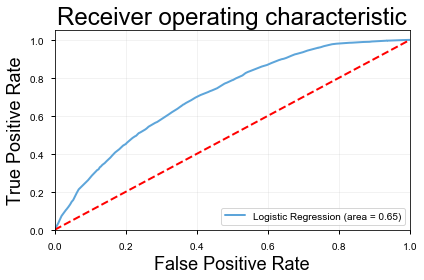

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()